### Ödev: Verileri inceleyin ve gerekli tüm verileri temizleyin. Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun. Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
from sklearn import linear_model
warnings.filterwarnings("ignore")



In [95]:
df= pd.read_csv("Desktop/Bootcamp Ödevler/house_prices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Veri Temizliği

In [97]:
for column in df.columns:
    if (df[column].isnull().sum()*100/df.shape[0])>0.0:
        print(column)
        print(df[column].isnull().sum()*100/df.shape[0])
        

    # boş değer içeren kolon sayısı 19.
    # hedef değişkenimiz SalePrice, boş değer içermiyor.
    # Özelliklerimizden sadece GarageQual boş değer içeriyor. 5.54 oranında.

LotFrontage
17.73972602739726
Alley
93.76712328767124
MasVnrType
0.547945205479452
MasVnrArea
0.547945205479452
BsmtQual
2.5342465753424657
BsmtCond
2.5342465753424657
BsmtExposure
2.6027397260273974
BsmtFinType1
2.5342465753424657
BsmtFinType2
2.6027397260273974
Electrical
0.0684931506849315
FireplaceQu
47.26027397260274
GarageType
5.5479452054794525
GarageYrBlt
5.5479452054794525
GarageFinish
5.5479452054794525
GarageQual
5.5479452054794525
GarageCond
5.5479452054794525
PoolQC
99.52054794520548
Fence
80.75342465753425
MiscFeature
96.3013698630137


In [98]:
ozellikler = ["LotArea", "Condition1", "YearBuilt", "BldgType", "OverallCond",
              "Heating", "TotRmsAbvGrd", "GarageQual", "PoolArea"]
for ozellik in ozellikler:
    print(ozellik, " : ", df[ozellik].unique())
    #TotrmsAbvGrd= 10,11,12,14 olanlar incelensin.

LotArea  :  [ 8450  9600 11250 ... 17217 13175  9717]
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
YearBuilt  :  [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
BldgType  :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
OverallCond  :  [5 8 6 7 4 2 3 9 1]
Heating  :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
TotRmsAbvGrd  :  [ 8  6  7  9  5 11  4 10 12  3  2 14]
GarageQual  :  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
PoolArea  :  [  0 512 648 576

In [99]:
df[(df["TotRmsAbvGrd"]>9)] # problem yok

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
118,119,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,320000
144,145,90,RM,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,ConLI,Abnorml,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1387,1388,50,RM,60.0,8520,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,8,2007,CWD,Family,136000
1416,1417,190,RM,60.0,11340,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,122500
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000


Sadece GarageQual kolonunda 5.5479 oranında boş değerler var

In [100]:
df["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [101]:
df["GarageQual"].isnull().sum()*100/df["GarageQual"].shape[0]

5.5479452054794525

In [102]:
df["GarageQual"].dropna(inplace=True)
df["GarageQual"].isnull().sum()*100/df["GarageQual"].shape[0]  #boş değer oranı az olduğu için boş değerleri veriden attık.

0.0

## Regresyon Modeli Oluşturma

Text(0.5, 1.0, 'SalePrice (Log)')

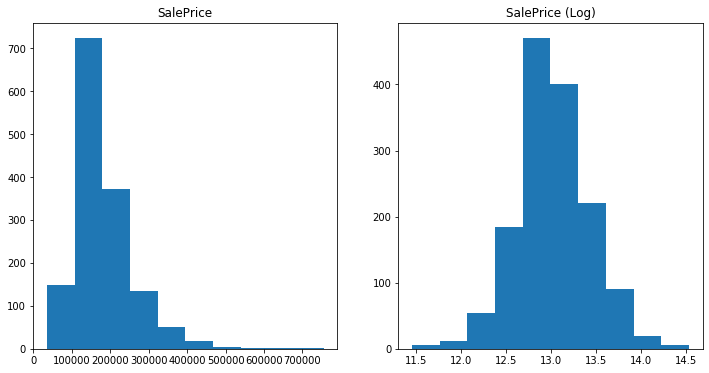

In [103]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(df["SalePrice"])
plt.title("SalePrice")

plt.subplot(122)
plt.hist(np.log(df["SalePrice"])+1)
plt.title("SalePrice (Log)")

#Hedef Değişken Log'lu normal dağılıma daha yakın.


In [104]:
df2 = df.copy()  
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
kolonlar_2 = ["SalePrice","LotArea", "Condition1", "YearBuilt", "BldgType", "OverallCond",
              "Heating", "TotRmsAbvGrd", "GarageQual", "PoolArea"]

for kolon in df.columns:
    if kolon not in kolonlar_2:
        df2.drop([kolon], axis=1, inplace=True)
df2.columns            

Index(['LotArea', 'Condition1', 'BldgType', 'OverallCond', 'YearBuilt',
       'Heating', 'TotRmsAbvGrd', 'GarageQual', 'PoolArea', 'SalePrice'],
      dtype='object')

Object kolonları category'e çevirme:

In [106]:
object_kolonlar= ["Condition1", "BldgType", "Heating", "GarageQual"]
for kolonlar in object_kolonlar:
    df2[kolonlar]= df2[kolonlar].astype("category")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
LotArea         1460 non-null int64
Condition1      1460 non-null category
BldgType        1460 non-null category
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
Heating         1460 non-null category
TotRmsAbvGrd    1460 non-null int64
GarageQual      1379 non-null category
PoolArea        1460 non-null int64
SalePrice       1460 non-null int64
dtypes: category(4), int64(6)
memory usage: 75.2 KB


One Hot Coding:

In [107]:
category_kolonlar= ["Condition1", "BldgType", "Heating", "GarageQual"]
df3=  pd.concat([df2, pd.get_dummies(df[category_kolonlar])], axis=1)
df3.drop(category_kolonlar, axis=1, inplace=True)

In [108]:
df3.head()

,LotArea,OverallCond,YearBuilt,TotRmsAbvGrd,PoolArea,SalePrice,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,8450,5,2003,8,0,208500,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,9600,8,1976,6,0,181500,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,11250,5,2001,6,0,223500,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,9550,5,1915,7,0,140000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,14260,5,2000,9,0,250000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


Regression Modeli

In [109]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
LotArea              1460 non-null int64
OverallCond          1460 non-null int64
YearBuilt            1460 non-null int64
TotRmsAbvGrd         1460 non-null int64
PoolArea             1460 non-null int64
SalePrice            1460 non-null int64
Condition1_Artery    1460 non-null uint8
Condition1_Feedr     1460 non-null uint8
Condition1_Norm      1460 non-null uint8
Condition1_PosA      1460 non-null uint8
Condition1_PosN      1460 non-null uint8
Condition1_RRAe      1460 non-null uint8
Condition1_RRAn      1460 non-null uint8
Condition1_RRNe      1460 non-null uint8
Condition1_RRNn      1460 non-null uint8
BldgType_1Fam        1460 non-null uint8
BldgType_2fmCon      1460 non-null uint8
BldgType_Duplex      1460 non-null uint8
BldgType_Twnhs       1460 non-null uint8
BldgType_TwnhsE      1460 non-null uint8
Heating_Floor        1460 non-null uint8
Heating_GasA         1460 non-nu

In [118]:
butun_kolonlar= df3.columns
istenen_kolonlar= []
for i in butun_kolonlar:
    if i != "SalePrice":
        istenen_kolonlar.append(i)
istenen_kolonlar
        

['LotArea',
 'OverallCond',
 'YearBuilt',
 'TotRmsAbvGrd',
 'PoolArea',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'Heating_Floor',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'GarageQual_Ex',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA']

In [124]:
Y= df3["SalePrice"]
X= df3[istenen_kolonlar]
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)
print("Değişkenler: {}".format(lrm.coef_))
print("Sabit değer: {}".format(lrm.intercept_))


Değişkenler: [ 1.20624214e+00  9.04874351e+03  1.35619919e+03  2.32948228e+04
  6.64025652e+01  9.27852102e+03 -5.26009971e+03  1.28206160e+04
  1.55676866e+04  2.69527959e+03 -3.54363956e+04 -6.14221528e+03
 -2.51364370e+04  3.16130443e+04  2.28064838e+04 -5.53399710e+02
 -3.63419436e+04 -1.29001380e+04  2.69889975e+04 -1.34409325e+04
 -8.18296256e+03  1.69960749e+04  5.90284808e+03  1.30965780e+04
 -1.43716059e+04  9.52785890e+04  1.53456957e+04  4.20396632e+04
  2.16078782e+03  1.02213471e+04]
Sabit değer: -2740524.5372298774
